In [1]:
import numpy as np
import scipy.linalg as la
import hamiltonian as hm
%matplotlib inline
import matplotlib.pyplot as plt
from random import gauss

# Breaking Degeneracies

In [2]:
def ising_mult(l):
    if (l==1): return np.zeros((2,2))
    if (l==2): return np.matmul(np.kron(hm.Z,hm.I), np.kron(hm.I, hm.Z))
    return (np.kron(ising_mult(l-1), np.eye(2)) + 
            np.kron(np.eye(2**(l-2)), np.matmul(np.kron(hm.Z,hm.I), np.kron(hm.I, hm.Z))))

In [3]:
def rand_vector():
    vec = [gauss(0, 1) for i in range(3)]
    mag = sum(x**2 for x in vec) ** .5
    return [x/mag for x in vec]

def rand_field(L):
    H = np.zeros((2**L, 2**L), dtype='complex128')
    for i in range(L):
        vec = rand_vector()
        Hi = 1
        for j in range(L):
            if (j==i): Hi = np.kron(Hi, vec[0]*hm.X+vec[1]*hm.Y+vec[2]*hm.Z)
            else: Hi = np.kron(Hi,hm.I)
        H += Hi
    return H

In [4]:
L = 8
dense = True
if (dense):
    H = hm.dense_H(L)
    fix = 'dense'
else:
    H = hm.sparse_H(L)
    fix = 'sparse'
# vals, vecs = la.eigh(H)

In [5]:
Z  = hm.Zl(L)
X  = hm.Xl(L)
Y  = hm.Yl(L)
S2 = hm.S2(L)
Z2 = hm.Z2(L)

In [6]:
Hsmal = hm.mat2list(H)[(int)(L/2)]
valsH, vecsH = la.eigh(Hsmal)
# hm.chop(valsH)

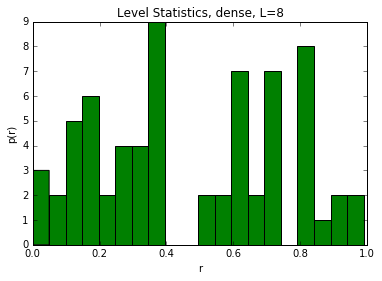

In [7]:
vals = valsH
# vals = valsH[valsH > 1e-10]
delta = (vals - np.roll(vals, 1))[1:]
stats = (np.minimum(delta, np.roll(delta, 1)) / np.maximum(delta, np.roll(delta, 1)))[1:]
n, bins, patches = plt.hist(stats, 20, facecolor='green')
plt.xlabel('r')
plt.ylabel('p(r)')
plt.title("Level Statistics, " + fix + ", L=" + str(L))
plt.show()
# plt.savefig("figures/level_stats_" + fix + "L" + str(L) + ".pdf")

### Use Ising Term

In [8]:
ising_strength = -.1
H_ising = H + ising_strength * ising_mult(L)
Hsmal_i = hm.mat2list(H_ising)[(int)(L/2)]
valsH_i, vecsH = la.eigh(Hsmal_i)

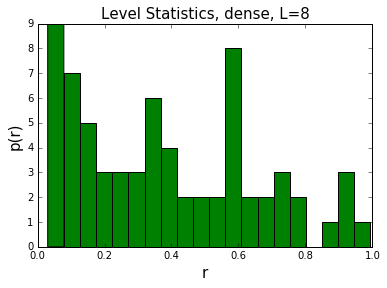

In [9]:
vals = valsH_i
# vals = valsH[valsH > 1e-10]
delta = (vals - np.roll(vals, 1))[1:]
stats = (np.minimum(delta, np.roll(delta, 1)) / np.maximum(delta, np.roll(delta, 1)))[1:]
n, bins, patches = plt.hist(stats, 20, facecolor='green')
plt.xlabel('r', fontsize=15)
plt.ylabel('p(r)', fontsize=15)
plt.title("Level Statistics, " + fix + ", L=" + str(L), fontsize=15)
plt.savefig("figures/level_stats_" + fix + "L" + str(L) + ".pdf")
plt.show()

### Vary Ising field

In [31]:
for i in range(100):
    ising_strength = -10
    H_ising = H + ising_strength * ising_mult(L)
    Hsmal_i = hm.mat2list(H_ising)[(int)(L/2)]
    vals, vecsH = la.eigh(Hsmal_i)
    
    # vals = valsH[valsH > 1e-10]
    delta = (vals - np.roll(vals, 1))[1:]
    stats = (np.minimum(delta, np.roll(delta, 1)) / np.maximum(delta, np.roll(delta, 1)))[1:]
    print(np.average(stats))

0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.0121635944855
0.012163

### Use Random Field

In [10]:
field_strength = 5
H_field = H + field_strength * rand_field(L)
Hsmal_r = hm.mat2list(H_field)[(int)(L/2)]
valsH_r, vecsH = la.eigh(H_field)
# hm.chop(valsH_r)

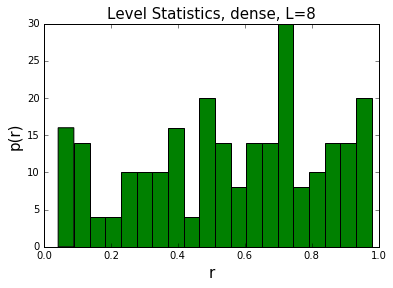

In [11]:
vals = valsH_r
# vals = valsH[valsH > 1e-10]
delta = (vals - np.roll(vals, 1))[1:]
# print(delta)
stats = (np.minimum(delta, np.roll(delta, 1)) / np.maximum(delta, np.roll(delta, 1)))[1:]
# print(stats)
n, bins, patches = plt.hist(stats, bins=20, facecolor='green')
plt.xlabel('r', fontsize=15)
plt.ylabel('p(r)', fontsize=15)
plt.title("Level Statistics, " + fix + ", L=" + str(L), fontsize=15)
# plt.savefig("figures/level_stats_" + fix + "L" + str(L) + ".pdf")
plt.show()

### With stats

In [12]:
field_strength = 5
trials = 10
per_trial = 10
data = np.zeros((trials, 20))
# evls = np.zeros((trials, 2**L))
for i in range(trials):
    stats = np.zeros(2**L-2)
    for j in range(per_trial):
        H_field = H + field_strength * rand_field(L)
#         Hsmal_r = hm.mat2list(H_field)[(int)(L/2)]
        valsH_r, vecsH = la.eigh(H_field)
        delta = (valsH_r - np.roll(valsH_r, 1))[1:]
        stats += (np.minimum(delta, np.roll(delta, 1)) / np.maximum(delta, np.roll(delta, 1)))[1:]
    data[i], bin_edges = np.histogram(stats[(int)(.25*len(stats)):(int)(.75*len(stats))]/per_trial, bins=20, range=(0,1))
    
    

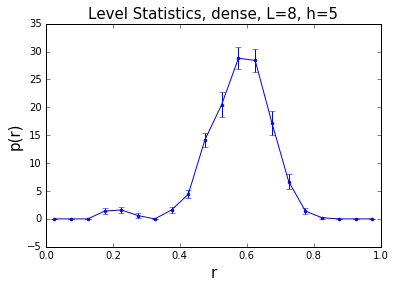

In [13]:
# y, bin_edges = np.histogram(np.mean(data, axis=1), bins=20)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.errorbar(
    bin_centers,
    np.mean(data, axis=0),
    yerr = np.std(data, axis=0)/np.sqrt(trials-1),
    marker = '.',
    drawstyle = 'steps-mid-'
)
plt.xlabel('r', fontsize=15)
plt.ylabel('p(r)', fontsize=15)
plt.title("Level Statistics, " + fix + ", L=" + str(L) + ", h=" + str(field_strength), fontsize=15)
plt.savefig("figures/level_stats_" + fix + "L" + str(L) + "h" + str(field_strength) + ".pdf")
plt.show()

### Expectations of S_z

In [14]:
field_strength = .0001
trials = 100
per_trial = 1
bins=40
data = np.zeros((trials, bins))
# evls = np.zeros((trials, 2**L))
for i in range(trials):
    stats = np.zeros(2**L)
    for j in range(per_trial):
        H_field = H + field_strength * rand_field(L)
#         Hsmal_r = hm.mat2list(H_field)[(int)(L/2)]
        valsH_r, vecsH = la.eigh(H_field)
        Zvals = hm.chop(np.einsum('ij,ji->i', np.dot(vecsH.conj().T, Z2), vecsH))
        stats += Zvals
#     data[i], bin_edges = np.histogram(stats[(int)(.25*len(stats)):(int)(.75*len(stats))]/per_trial, bins=bins, range=(0-5/bins,10-5/bins))
    data[i], bin_edges = np.histogram(stats/per_trial, bins=bins, range=(0-5/bins,10-5/bins))



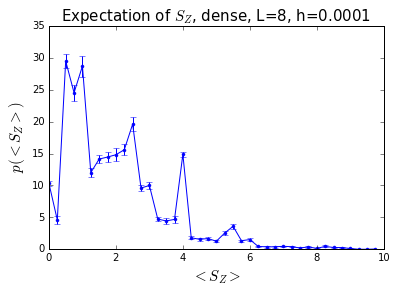

In [23]:
# y, bin_edges = np.histogram(np.mean(data, axis=1), bins=20)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.errorbar(
    bin_centers,
    np.mean(data, axis=0),
    yerr = np.std(data, axis=0)/np.sqrt(trials-1),
    marker = '.',
    drawstyle = 'steps-mid-'
)
plt.xlabel('$<S_Z>$', fontsize=15)
plt.ylabel('$p(<S_Z>)$', fontsize=15)
plt.title("Expectation of $S_Z$, " + fix + ", L=" + str(L) + ", h=" + str(field_strength), fontsize=15)
plt.savefig("figures/total_Sz_" + fix + "L" + str(L) + "h" + str(field_strength) + ".pdf")
plt.show()

In [16]:
strength = 0.0001
valsH_r, vecsH = la.eigh(H + strength*rand_field(L))
Zvals = np.einsum('ij,ji->i', np.dot(vecsH.conj().T, Z), vecsH)
Z2vals = np.einsum('ij,ji->i', np.dot(vecsH.conj().T, Z2), vecsH)
S2vals = np.einsum('ij,ji->i', np.dot(vecsH.conj().T, S2), vecsH)

In [17]:
indices = np.argsort(Z2vals)
for i in indices:
#     print(np.sort(np.abs(Zvals))[i], np.sort(Z2vals)[i])
    print(hm.chop(Z2vals[i]), (valsH_r[i]))

0 6.63565657735
0 -6.63565657735
0 -2.96192197926
0 2.96192197926
0 2.74821583409
0 -2.74821583409
0 -5.23184556662
0 5.23184556662
0.5 -0.784212442467
0.5 0.784212442467
0.5 0.784456868148
0.5 -0.784456868148
0.51 -2.63071437941
0.51 2.63071437941
0.51 2.63094175548
0.51 -2.63094175548
0.526 5.16238384688
0.526 -5.16238384688
0.527 5.16220281252
0.527 -5.16220281252
0.563 4.23816959347
0.563 -4.23816959347
0.563 -4.23826578083
0.563 4.23826578083
0.58 -5.96248785565
0.58 5.96248785565
0.58 5.96260579656
0.58 -5.96260579656
0.606 -3.22406738594
0.606 3.22406738594
0.606 -3.2239202454
0.606 3.2239202454
0.614 4.93903800876
0.614 -4.93903800876
0.614 -4.93922366897
0.614 4.93922366897
0.624 -7.45108534909
0.624 7.45108534909
0.624 -7.45089975327
0.624 7.45089975327
0.64 -2.23266868175
0.64 2.23266868175
0.64 2.23278261094
0.64 -2.23278261094
0.641 -0.50213457406
0.641 0.50213457406
0.641 -1.79163961232
0.641 1.79163961232
0.641 1.79174680613
0.641 -1.79174680613
0.651 -2.55955430085
0.65

In [18]:
hm.chop(vecsH.conj().T @ Z@Z @ vecsH)


chop() removed the imaginary part
 


array([[ 2.074,  1.438,  0.786, ..., -0.   ,  0.   , -0.   ],
       [ 1.438,  1.963,  0.587, ..., -0.   ,  0.   ,  0.   ],
       [ 0.786,  0.587,  1.926, ...,  0.   , -0.   , -0.   ],
       ..., 
       [-0.   , -0.   ,  0.   , ...,  1.926,  0.587,  0.786],
       [ 0.   ,  0.   , -0.   , ...,  0.587,  1.963,  1.438],
       [-0.   ,  0.   , -0.   , ...,  0.786,  1.438,  2.074]])

In [19]:
for i in range(2**L):
    for j in range(2**L):
        if ((Z[i,j] != 0)): print(Z[i,j], i, j)

4.0 0 0
3.0 1 1
3.0 2 2
2.0 3 3
3.0 4 4
2.0 5 5
2.0 6 6
1.0 7 7
3.0 8 8
2.0 9 9
2.0 10 10
1.0 11 11
2.0 12 12
1.0 13 13
1.0 14 14
3.0 16 16
2.0 17 17
2.0 18 18
1.0 19 19
2.0 20 20
1.0 21 21
1.0 22 22
2.0 24 24
1.0 25 25
1.0 26 26
1.0 28 28
-1.0 31 31
3.0 32 32
2.0 33 33
2.0 34 34
1.0 35 35
2.0 36 36
1.0 37 37
1.0 38 38
2.0 40 40
1.0 41 41
1.0 42 42
1.0 44 44
-1.0 47 47
2.0 48 48
1.0 49 49
1.0 50 50
1.0 52 52
-1.0 55 55
1.0 56 56
-1.0 59 59
-1.0 61 61
-1.0 62 62
-2.0 63 63
3.0 64 64
2.0 65 65
2.0 66 66
1.0 67 67
2.0 68 68
1.0 69 69
1.0 70 70
2.0 72 72
1.0 73 73
1.0 74 74
1.0 76 76
-1.0 79 79
2.0 80 80
1.0 81 81
1.0 82 82
1.0 84 84
-1.0 87 87
1.0 88 88
-1.0 91 91
-1.0 93 93
-1.0 94 94
-2.0 95 95
2.0 96 96
1.0 97 97
1.0 98 98
1.0 100 100
-1.0 103 103
1.0 104 104
-1.0 107 107
-1.0 109 109
-1.0 110 110
-2.0 111 111
1.0 112 112
-1.0 115 115
-1.0 117 117
-1.0 118 118
-2.0 119 119
-1.0 121 121
-1.0 122 122
-2.0 123 123
-1.0 124 124
-2.0 125 125
-2.0 126 126
-3.0 127 127
3.0 128 128
2.0 129 129

In [20]:
# np.all(np.isclose(S2@vecsH, S2vals*vecsH))
np.max(S2@vecsH- S2vals*vecsH)

(3.6095121170086171-2.4266725925977742e-17j)

In [21]:
vecsH.T

array([[ -4.21444977e-10 -0.00000000e+00j,
         -6.25919670e-06 +3.07599403e-06j,
          9.55384732e-07 -1.15447511e-05j, ...,
         -2.92855230e-07 -2.05573304e-07j,
          2.72041932e-09 +1.65950530e-07j,
         -7.26073575e-12 +6.06936149e-12j],
       [ -4.22457905e-10 -0.00000000e+00j,
         -6.27413666e-06 +3.08342134e-06j,
          9.57740403e-07 -1.15731195e-05j, ...,
          1.16859603e-06 +8.20099269e-07j,
         -1.09353159e-08 -6.62155344e-07j,
          2.89665444e-11 -2.42203463e-11j],
       [ -2.59323895e-10 -0.00000000e+00j,
         -3.85128699e-06 +1.89276538e-06j,
          5.87941137e-07 -7.10448879e-06j, ...,
         -2.85555532e-06 -2.00346074e-06j,
          2.69165149e-08 +1.61791564e-06j,
         -7.07664591e-11 +5.91878330e-11j],
       ..., 
       [  9.22555760e-11 -0.00000000e+00j,
         -1.01734918e-06 -1.25832276e-06j,
         -9.05062248e-07 +3.36881485e-06j, ...,
          5.00897429e-06 +5.07243653e-06j,
         -4.168535

In [22]:
hm.chop(Z2)

array([[16,  0,  0, ...,  0,  0,  0],
       [ 0,  9,  0, ...,  0,  0,  0],
       [ 0,  0,  9, ...,  0,  0,  0],
       ..., 
       [ 0,  0,  0, ...,  9,  0,  0],
       [ 0,  0,  0, ...,  0,  9,  0],
       [ 0,  0,  0, ...,  0,  0, 16]])

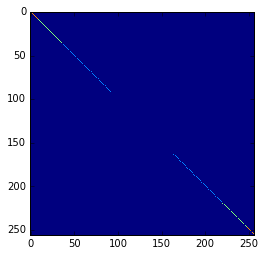

In [40]:
alph2Sz, Sz2alph = hm.permutations(L)
plt.imshow(np.absolute(hm.Zl(L))[alph2Sz][:,alph2Sz], interpolation='nearest')
plt.show()